<a href="https://colab.research.google.com/github/tegaryas/11181081_Tegar-Yasindra_DM_IF-ITK/blob/main/Iris_Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#**Data Preprocessing**

Pertama kita integrasikan Google Drive dengan Google Colab

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cd /content/gdrive/My Drive/Colab Notebooks/Iris Flower Machine Learning

/content/gdrive/My Drive/Colab Notebooks/Iris Flower Machine Learning


Membuat variable DATA_PATH sehingga bisa diubah kapan pun dengan mudah

In [6]:
DATA_PATH = '/content/gdrive/My Drive/Colab Notebooks/Iris Flower Machine Learning/IRIS.csv'

Melakukan Read dataset yang telah kita masukkan dan sediakan di Google Drive

In [7]:
data = pd.read_csv(DATA_PATH)

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data.shape

(150, 5)

In [12]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [14]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


#**Visualisasi Dataset**

Dari visualisasi data yang telah kita lakukan dapat dilihat bahwa species Iris yaitu Iris Sentosa memiliki perbedaan karakteristik sehingga membuat dia terpisah dengan 2 jenis lainnya

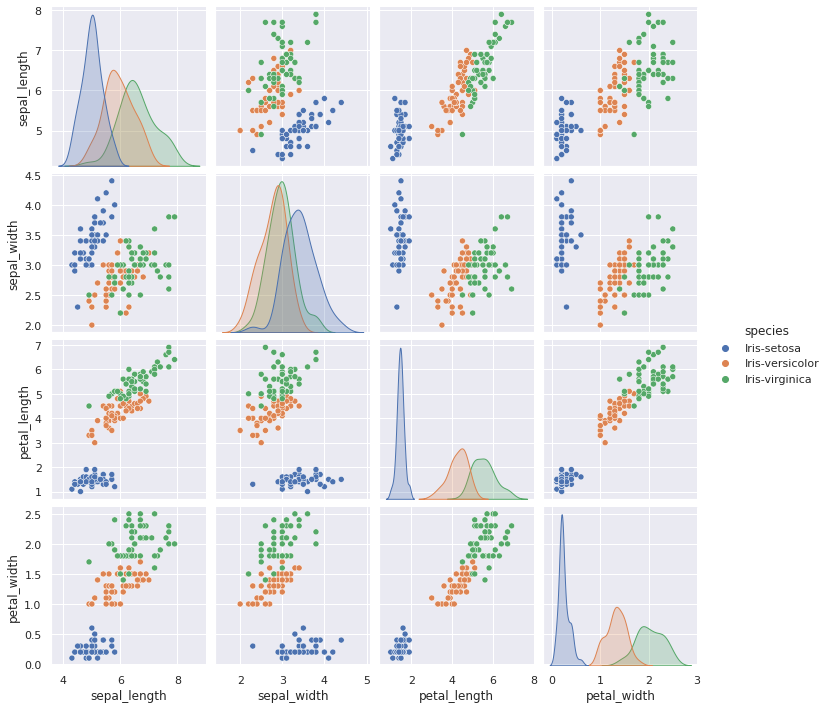

In [15]:
sns.pairplot(data, hue='species')

# **Melakukan Training Dataset dengan membanding kan 2 Model Klasifikasi**

Melakukan import metrics untuk evaluasi model

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

Pertama kita akan memisahkan data kedalam dependent dan independent variable

Setelah itu melakukan pembagian dataset untuk training dan test dataset dari model yang akan dilatih

In [19]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

## **Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Import model yang akan kita gunakan

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Membuat List yang dimasukkan model yang akan kita train

In [33]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])

lst_1= []

for m in range(len(models)):
  lst_2= []
  model = models[m][1]
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
  print(models[m][0])
  print(cm)
  print('')
  print('Akurasi',accuracy_score(y_test, y_pred))
  print('')
  print("Rata-Rata AKurasi: {:.2f} %".format(accuracies.mean()*100))
  print('')
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
  print('')
  print('-----------------------------------')
  print('')
  lst_2.append(models[m][0])
  lst_2.append((accuracy_score(y_test, y_pred))*100) 
  lst_2.append(accuracies.mean()*100)
  lst_2.append(accuracies.std()*100)
  lst_1.append(lst_2)

Logistic Regreesion
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Akurasi 1.0

Rata-Rata AKurasi: 95.00 %

Standard Deviation: 5.53 %

-----------------------------------

SVM
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Akurasi 1.0

Rata-Rata AKurasi: 94.17 %

Standard Deviation: 6.51 %

-----------------------------------



Membuat DataFrame untuk melakukan perbandingan dan melihat urutan model mana yang memiliki akurasi yang lebih baik

In [29]:
modelDF = pd.DataFrame(lst_1, columns= ['Model', 'Akurasi', 'Rata-Rata Akurasi', 'Std. Devation'])

In [30]:
modelDF.sort_values(by= ['Akurasi', 'Rata-Rata Akurasi'], inplace= True, ascending= False)

Melihat DataFrame model yang telah kita buat sebelumnya  

In [31]:
modelDF

,Model,Akurasi,Rata-Rata Akurasi,Std. Devation
0,Logistic Regreesion,100.0,95.000000,5.527708
1,SVM,100.0,94.166667,6.508541


## Kesimpulan 

Dari 2 model yang telah kita latih didapatkan logistic Regression memiliki Rata-rata akurasi yang lebih tinggi dari model SVM. Jadi model Logistic Regression cocok untuk digunakan dalam melakukan klasifikasi bungan Iris ini.